In [1]:
import fitsio
%matplotlib inline
import sys
sys.path.append('/Users/vipasu/Dropbox/Research/addgals/code_for_addgals')
from routines import * 


In [2]:
data_dir = '../'
__builtin__.image_prefix = data_dir + "plots/"

mkdir_p(image_prefix)

In [3]:
##################################################
# read data
d0 = fits_to_pandas(fitsio.read(data_dir + 'Becker_CAM_mock.fits', lower=True))
box_size = 250.0    
np.random.seed(111)


Here is the initialization of parameters which describe the training set
 - 9 < M\* < 13.0
 - Mass cut for halos is 1e12
 - nn = 1 -> get the nearest massive halo

In [4]:
mass, smin, smax, Mv_cut, nn =  5e12, 9.0, 13.0, 1e12, 1
name = "mv cut {}; {} < M* < {}".format(Mv_cut, smin, smax)
d, dp = catalog_selection(d0, Mv_cut, smin, smax)
#dist, mvir, _ = get_dist_mass_vmax(dp,d, nn, Mv_cut)
dist, res = get_dist_and_attrs(dp, d, nn, ['mvir', 'vmax'])
mvir, vmax = res
d['host_mvir'] = mvir
d['host_vmax'] = vmax
d['host_dist'] = dist
print "Number of data points", len(d)
d_train, d_test = split_octant(d, box_size)

0 207054
10000 207054
20000 207054
30000 207054
40000 207054
50000 207054
60000 207054
70000 207054
80000 207054
90000 207054
100000 207054
110000 207054
120000 207054
130000 207054
140000 207054
150000 207054
160000 207054
170000 207054
180000 207054
190000 207054
200000 207054
Number of data points 207054


Select which features to train on, including
- distance to nearest massive halo
- mass of nearest massive halo
- M\* of the galaxy

In [5]:
features = ['host_dist', 'host_mvir', 'mstar']
Xtrain, ytrain, x_scaler, y_scaler = select_features(features, d_train, scaled=True)
Xtest, ytest = select_features(features, d_test, scaled=False)
Xtest, ytest = x_scaler.transform(Xtest), y_scaler.transform(ytest)

model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)

y_hat_scaled = model.predict(Xtest)
y_hat = y_scaler.inverse_transform(y_hat_scaled)
d_test['pred'] = y_hat
print min(y_hat), max(y_hat)

-13.0022602081 -8.60770988464


[-2.3979279159240803, 12.715696136482656]


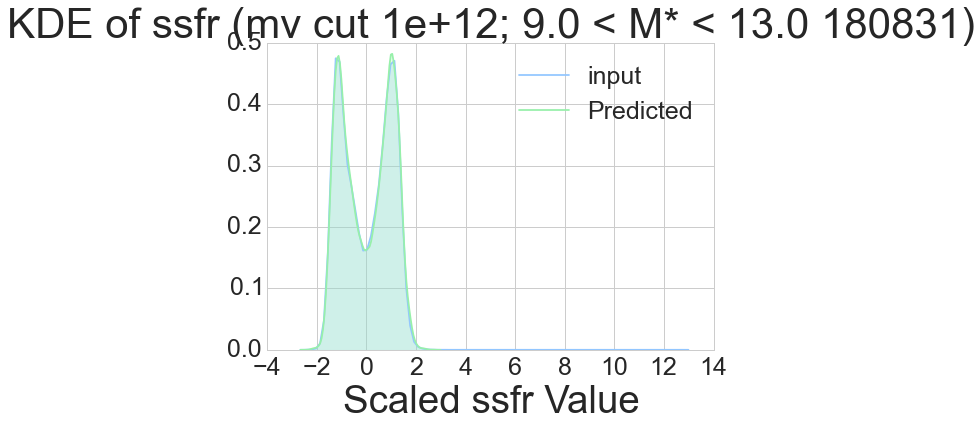

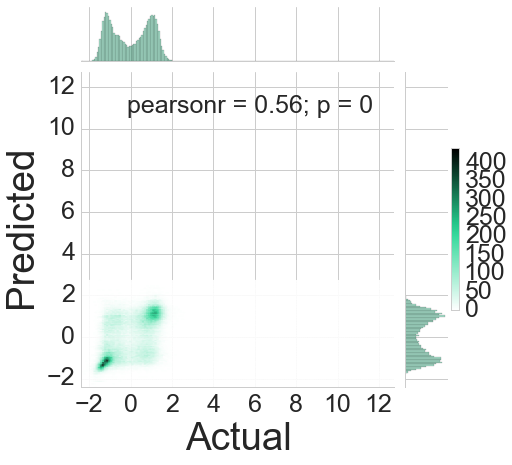

In [6]:
sample_model(model, name, Xtrain, ytrain, Xtest, ytest, -1)

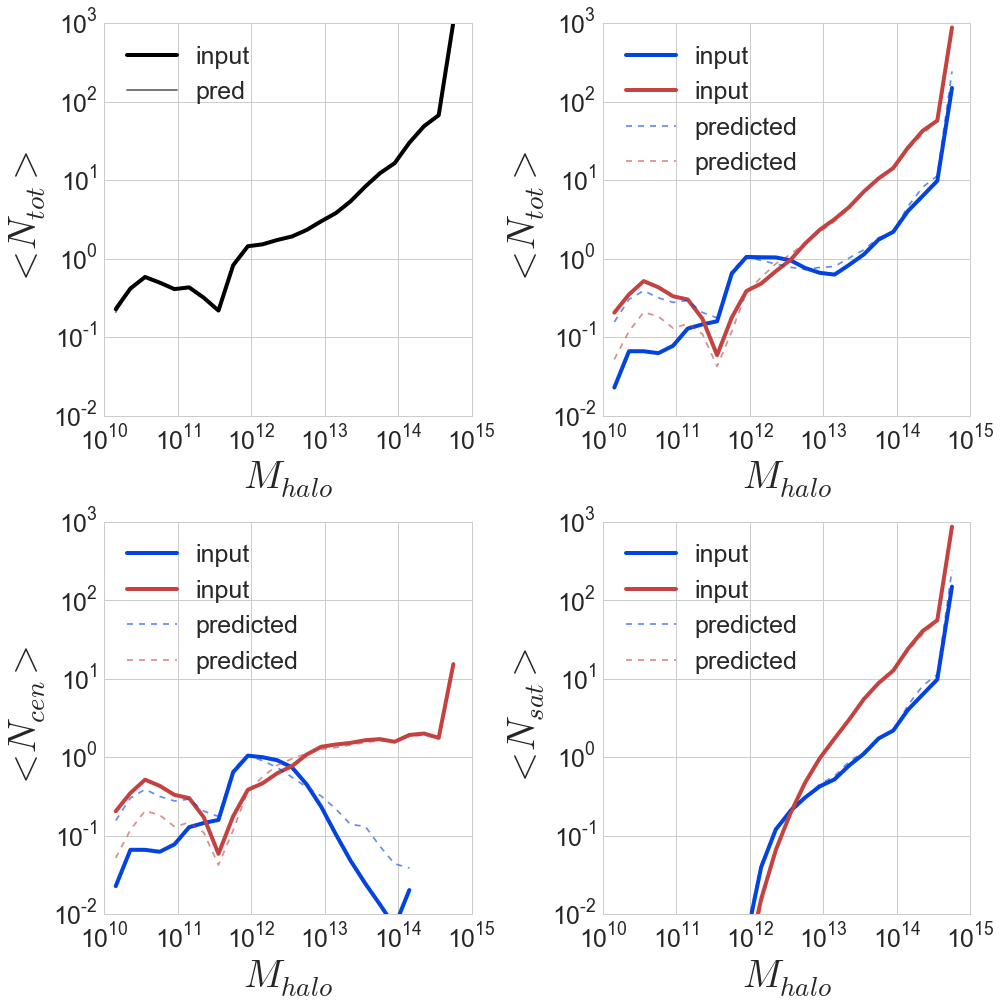

In [7]:
plot_HOD(d0, d_test, '9.0-13.0 dist mvir', 9.0, 13.0)

Chi square is:  (0.5020331663211256, 0.99999994609344944)


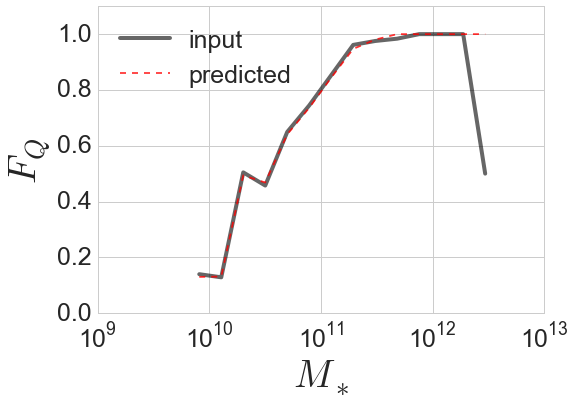

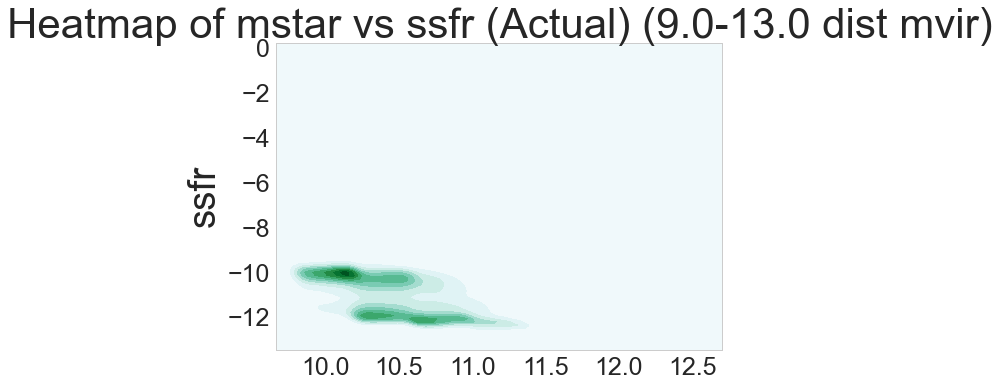

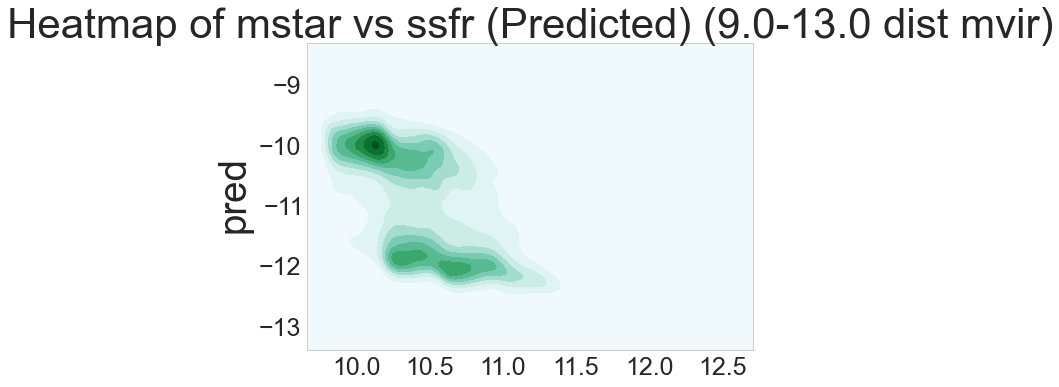

In [ ]:
plot_p_red(10**d_test['mstar'].values, d_test['ssfr'], d_test['pred'], '9.0-13.0 dist mvir')

In [ ]:
N_splits = 5
for i in xrange(1, N_splits):
    desc = name + " (" + str(i+1) + ")"
    actual_xis, actual_cov, pred_xis, pred_cov = wprp_comparison(d_test, desc, i)
    plot_wprp(actual_xis, actual_cov, pred_xis, pred_cov, desc, i)

In [ ]:
c_actual, c_pred = wprp_fraction(d_test, name + 'mvir + dist')
plt.semilogx(r, c_actual, label='actual', color='k')
plt.plot(r, c_pred, label='predicted', color=blue_col)
plt.title('Ratio of quenched vs starforming correlation function - d + M 1e12')
plt.xlabel('r')
plt.ylabel('wp_quenched/wp_starforming')
plt.legend()

In [ ]:
plot_richness_scatter(d_test, 'd + M 1e12', d0)